## The Sparks Foundation - Data Science and Business Analytics Internship

## Task 1 - Prediction using Supervized Machine learning

#### In this task, it is required to predict the scores of a student based on the number of hours studied using Linear Regresssion.

#### Name - Tushar gambhir

## Importing Liabraries and Observing the Dataset

In [13]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ingnore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [14]:
# Reading the data with the link
df = pd.read_csv('http://bit.ly/w-data')

In [15]:
# To find the no. of rows and coloumns in the data
df.shape

(25, 2)

In [16]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [74]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [17]:
# To find some important information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
# Lets see if there is any missing values in our data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Vizualization 

Text(0.5, 1.0, 'hours studied vs Scores')

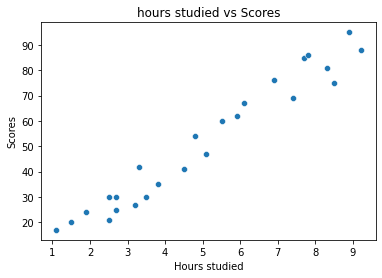

In [75]:
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.title('hours studied vs Scores')

#### we can observe that there is a perfect linear relation between the two variables 'Hours studied' and 'Scores attained'.

In [21]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### There is positive correlation between the variables.

<AxesSubplot:xlabel='Hours', ylabel='count'>

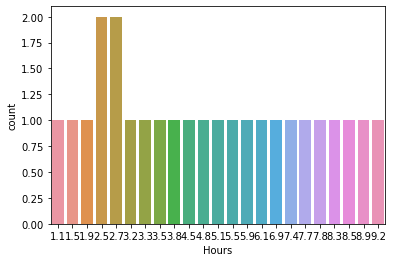

In [23]:
sns.countplot(x='Hours',data=df)

<AxesSubplot:xlabel='Scores', ylabel='count'>

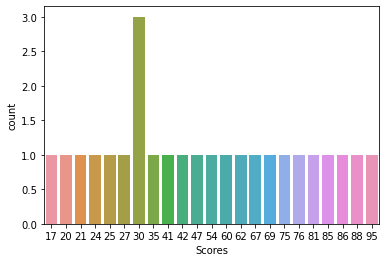

In [24]:
sns.countplot(x='Scores',data=df)

## Data Preparation

In [25]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
# dividing the data into dependent and independent variables
x = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [32]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [33]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [34]:
# Splitting the model into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

## Training the Model

#### Let's train the model

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Vizualizing the Model

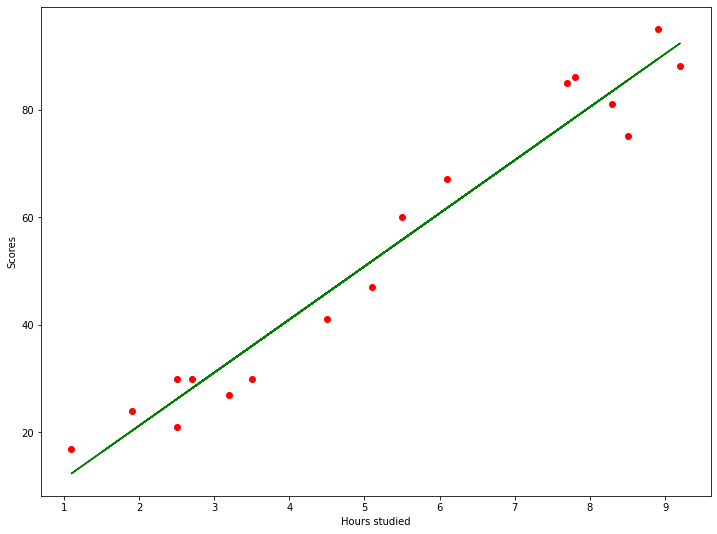

In [45]:
line = model.coef_*x + model.intercept_
# for training data
plt.figure(figsize=(12,9))
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='green')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

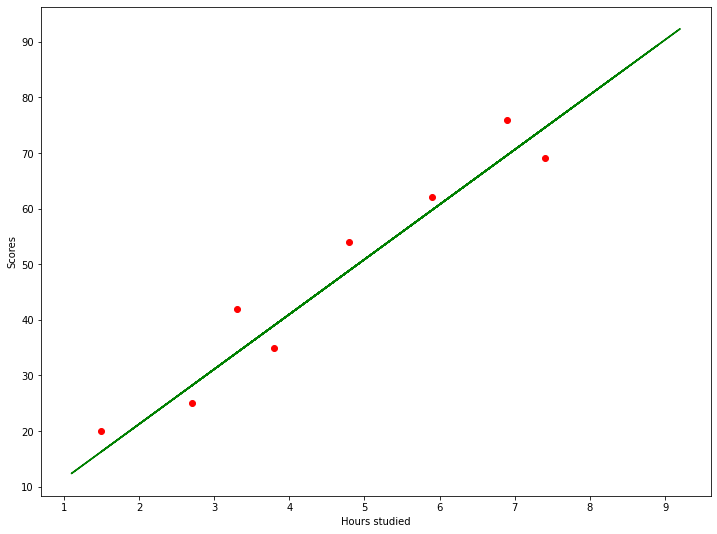

In [46]:
# for test data
plt.figure(figsize=(12,9))
plt.scatter(x_test,y_test,color='red')
plt.plot(x,line,color='green')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

## Making Predections

In [47]:
y_pred = model.predict(x_test)

In [50]:
y_test

array([[25],
       [35],
       [42],
       [62],
       [20],
       [69],
       [76],
       [54]], dtype=int64)

In [49]:
y_pred

array([[28.14877107],
       [39.00765694],
       [34.07179972],
       [59.73825724],
       [16.30271375],
       [74.54582888],
       [69.60997167],
       [48.87937137]])

In [53]:
# comparing Actual vs Predicted values
AvP = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
AvP

,Actual,Predicted
0,"[[25], [35], [42], [62], [20], [69], [76], [54]]","[[28.14877106638302], [39.007656937813124], [3..."


## Error or Residual

<AxesSubplot:>

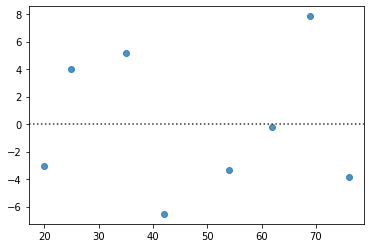

In [54]:
# Shows difference between the actual and predicted values(error)
sns.residplot(y_test,y_pred)

In [62]:
df_error = pd.DataFrame(y_test-y_pred)
df_error.sort_index(inplace=True)
df_error

,0
0,-3.148771
1,-4.007657
2,7.928200
3,2.261743
4,3.697286
5,-5.545829
6,6.390028
7,5.120629


### Let's predict the score when a student studies for 9.25 hours

In [72]:
hours = 9.25
pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",pred[0])

The predicted score if a person studies for 9.25 hours is [92.80850057]


## Model Evaluation

In [73]:
from sklearn import metrics

print("Mean Absolute Errror",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Errror 4.762517892332275
